<img src="Downloads/Music.jfif" alt="Image Title" width="500" />

## the classes of Musics

- Acoustic/Folk_0
Acoustic Folk Genre

- Alt_Music_1
Alt Music Genre

- Blues_2
Blues Genre

- Bollywood_3
Bollywood Music Genre

- Country_4
Country Music Genre

- HipHop_5
HipHop Music Genre

- Indie Alt_6
Indie Music Genre

- Instrumental_7
Instrumental Music Genre

- Metal_8
Metal Music Genre

- Pop_9
Pop Music Genre
- Rock_10 

## the instrumentalness column:
## is a term often used for which a song is instrumental (i.e., contains no vocals or minimal vocal content). It is typically represented as a numerical value ranging from 0 to 1, where:

- ## 0 indicates that the track is primarily vocal, with little to no instrumental sections.
- ## 1 indicates that the track is purely instrumental, containing no vocals at al

## speechiness columns:
## is an audio feature that helps distinguish between speech and music in a track.
### -Low speechiness (closer to 0): The track is likely more musical, with little or no spoken words. Examples might include instrumental music or purely sung tracks.
### - Medium speechiness (around 0.33): The track contains both music and speech, such as a song with a verse of rap or a mix of music and spoken content.
### - High speechiness (closer to 1): The track is mostly or entirely composed of spoken words, such as podcasts, audiobooks, or speeches.
## speechiness is the opposite of the instrumentalness 

In [132]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import re
import nltk
from imblearn.under_sampling import TomekLinks
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import  hstack,csr_matrix
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import StackingClassifier

In [7]:
df=pd.read_csv("Desktop/Data/train.csv",sep=",",encoding="latin1")
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [9]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

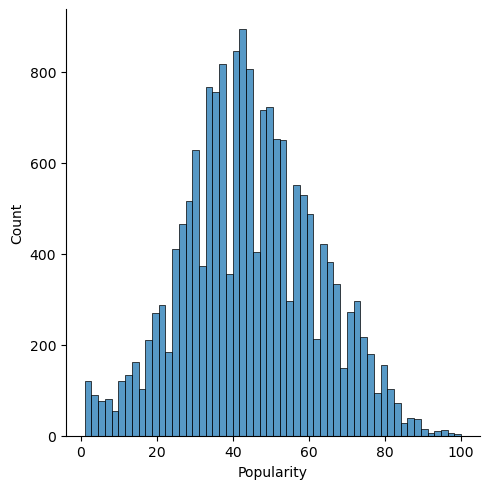

In [10]:
sns.displot(df["Popularity"])

In [11]:
df = df[df["Popularity"].notnull()]

## i reomoved  the rows that have null in popularity because there are small number and the Popularity of the singer will not be importatnt for the user or the model to predict

In [13]:
df.shape

(17568, 17)

In [14]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity               0
danceability             0
energy                   0
key                   1955
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4262
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

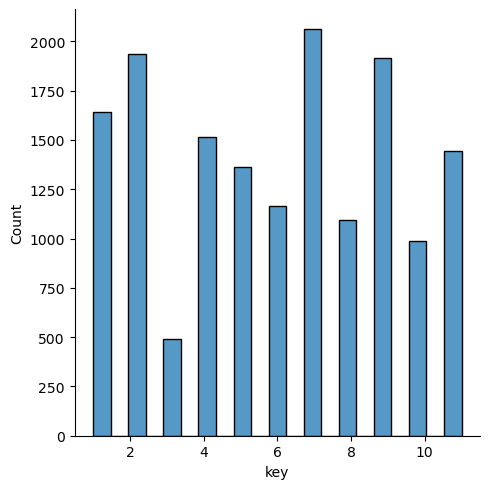

In [15]:
sns.displot(df["key"])

In [16]:
imputer = KNNImputer(n_neighbors=5)

In [17]:
numeric_data = df[["key"]]


imputer = KNNImputer(n_neighbors=5) 


imputed_data = imputer.fit_transform(numeric_data)


df["key"] = imputed_data[:, 0]  


C:\Users\hp\AppData\Local\Temp\ipykernel_16676\259945841.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["key"] = imputed_data[:, 0]


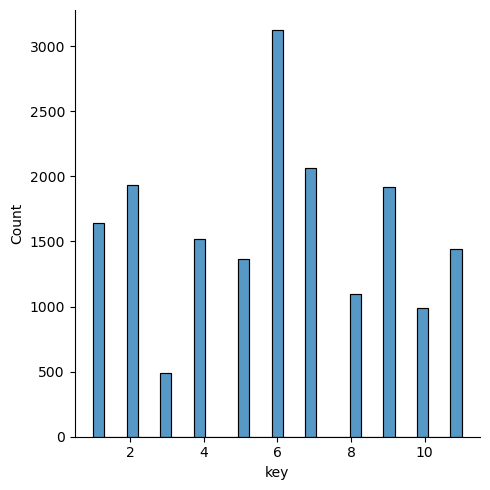

In [18]:
sns.displot(df["key"])

## when i use knn to fill missing values it changed the distributaion of data 
## and the key columns one of important data is should be good to increase features for the model and show the user the right key for the song 
## so i will not take knn 

In [20]:
list_key=df["key"].dropna()
df["key"]=df["key"].fillna(pd.Series(np.random.choice(list_key,len(df.index))))

C:\Users\hp\AppData\Local\Temp\ipykernel_16676\1118630074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["key"]=df["key"].fillna(pd.Series(np.random.choice(list_key,len(df.index))))


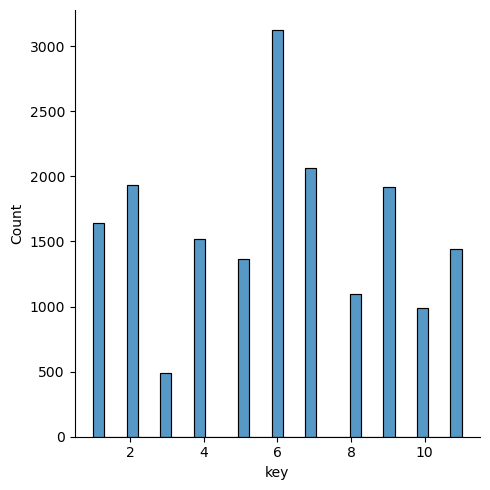

In [21]:
sns.displot(df["key"])

## the fill null with random choice in list of keys keep the distrubistion of the data

In [23]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4262
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [24]:
df["instrumentalness"].nunique()

4219

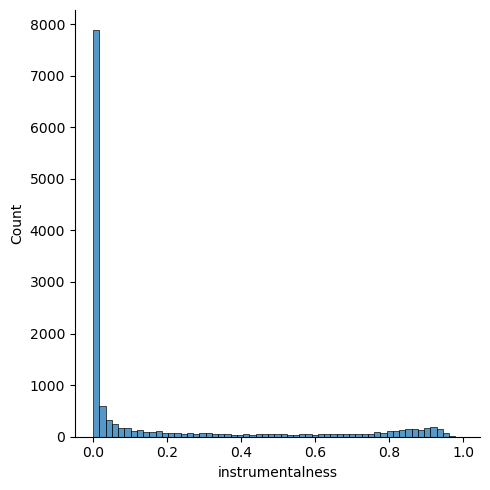

In [25]:
sns.displot(df["instrumentalness"])

In [26]:
imputer = KNNImputer(n_neighbors=5)

In [27]:
numeric_data = df[["instrumentalness"]]


imputer = KNNImputer(n_neighbors=5) 


imputed_data = imputer.fit_transform(numeric_data)


df["instrumentalness"] = imputed_data[:, 0] 

C:\Users\hp\AppData\Local\Temp\ipykernel_16676\4260504890.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["instrumentalness"] = imputed_data[:, 0]


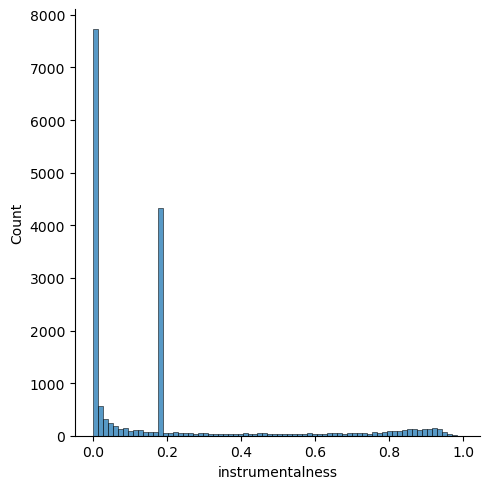

In [28]:
sns.displot(df["instrumentalness"])

In [29]:
df[(df["instrumentalness"] < 0.2) & (df["instrumentalness"] > 0.15)]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.000000,-4.964,1,0.0485,0.017100,0.177543,0.0849,0.8990,134.071,234596.000000,4,5
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.000000,-6.528,0,0.0555,0.021200,0.177543,0.1220,0.5690,107.033,173968.000000,4,5
9,Dudu Aharon,"âÃ¬âÃ¯âÃ¬âÃ¯, âÃ´âÃªâÃºâÃºâÃ...",14.0,0.716,0.885,1.000000,-4.348,0,0.0333,0.061400,0.177543,0.2530,0.8330,128.043,164093.000000,4,9
11,Arctic Monkeys,The View From The Afternoon,59.0,0.387,0.922,9.000000,-5.192,0,0.0674,0.004870,0.177543,0.1870,0.4170,146.478,222947.000000,4,10
12,Eyal Golan,âÃâÂ®âÃ¯âÃ«âÃ® âÃªâÃºâÃ´âÃ´,34.0,0.585,0.381,1.000000,-7.622,0,0.0463,0.435000,0.177543,0.1260,0.3220,143.876,206875.000000,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17974,Seventeen Again (feat. Novo Amor),"Charli Adams, Novo Amor",48.0,0.338,0.282,3.000000,-10.902,1,0.0293,0.640000,0.177543,0.1110,0.0952,141.468,3.408667,3,0
17978,Lil Durk,Love You Too (feat. Kehlani),55.0,0.384,0.820,5.000000,-3.928,0,0.2010,0.397000,0.177543,0.1140,0.4410,90.712,178605.000000,4,5
17985,Hippie Hourrah,La guerre,2.0,0.610,0.766,5.957407,-8.266,1,0.0267,0.000559,0.174000,0.0887,0.9320,118.013,271467.000000,4,6
17986,John Mayer,"Free Fallin' - Live at the Nokia Theatre, Los ...",71.0,0.315,0.296,5.000000,-13.262,1,0.0315,0.771000,0.177543,0.7020,0.4350,173.509,4.392883,4,0


## althought the knn change the distrubution of the data but it is more reiliable bescuase the songs that have close speechiness and livness and valence it have big percantage that have the number of instrumentalness

In [31]:
df.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [32]:
df.shape

(17568, 17)

In [33]:
df.duplicated().sum()

0

## There are no duplicates. I think this is because if any songs had the same features as another, it would be considered stealing.

<Axes: xlabel='Class'>

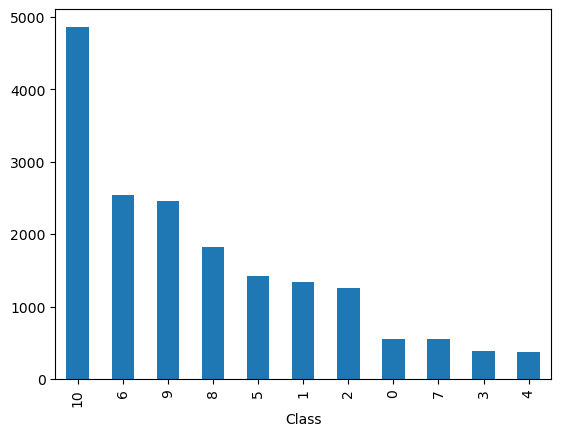

In [35]:
df["Class"].value_counts().plot(kind="bar")

In [36]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

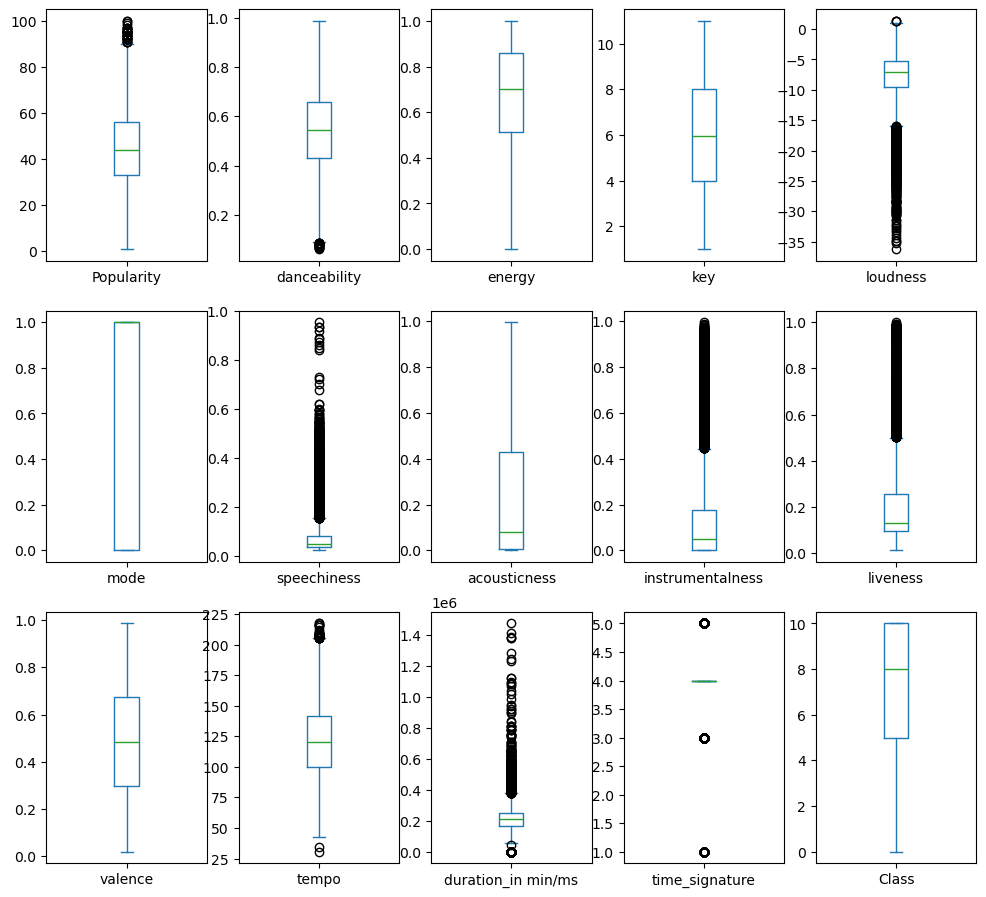

In [37]:
df.plot(kind="box",subplots=True,figsize=(12,15),layout=(4,5))
plt.show()

## i will romeve the outlaires in speechiness but don't worry it will not romve some important data can effect on model because there is another columns it effect with speechnes like instrumentalness

Text(0, 0.5, 'Class')

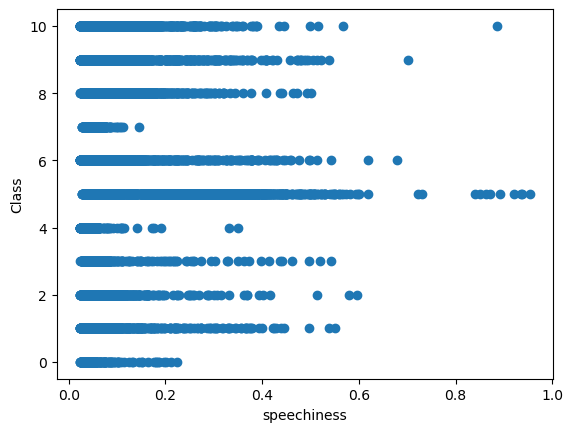

In [39]:
plt.scatter(df["speechiness"],df["Class"])
plt.xlabel("speechiness")
plt.ylabel("Class")

In [40]:
df=df[df["speechiness"]<0.7]

Text(0, 0.5, 'Class')

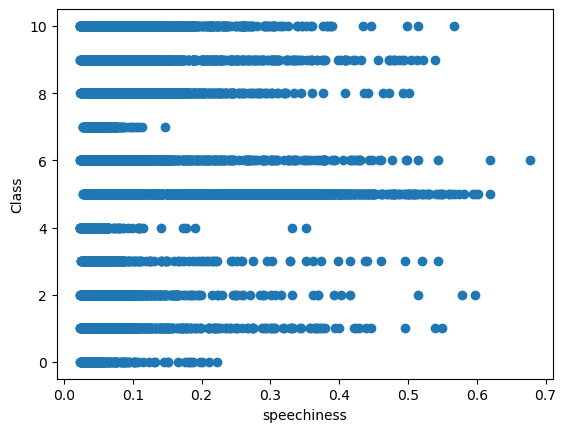

In [41]:
plt.scatter(df["speechiness"],df["Class"])
plt.xlabel("speechiness")
plt.ylabel("Class")

Text(0, 0.5, 'Class')

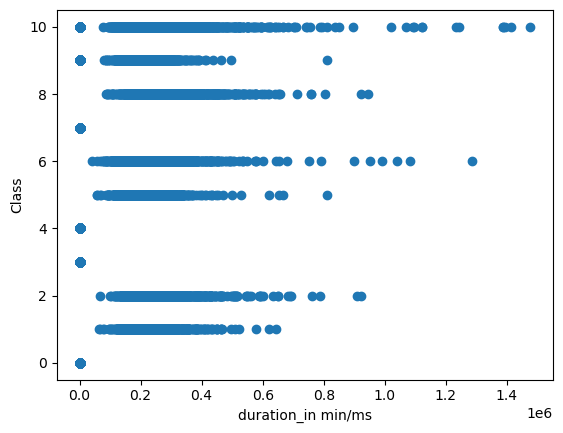

In [42]:
plt.scatter(df["duration_in min/ms"],df["Class"])
plt.xlabel("duration_in min/ms")
plt.ylabel("Class")

In [43]:
df = df[df['duration_in min/ms'] <1000000]

Text(0, 0.5, 'Class')

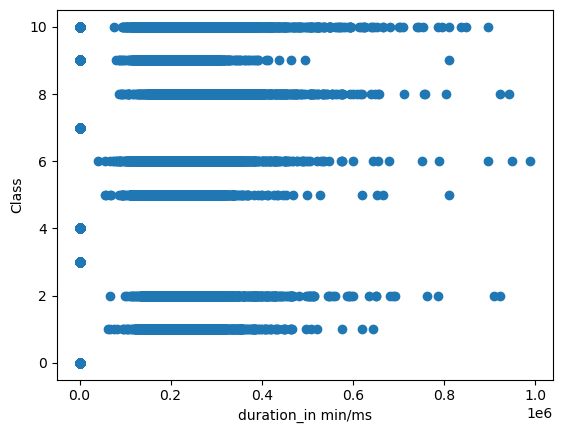

In [44]:
plt.scatter(df['duration_in min/ms'] , df['Class'])
plt.xlabel("duration_in min/ms")
plt.ylabel("Class")

<Axes: xlabel='Class'>

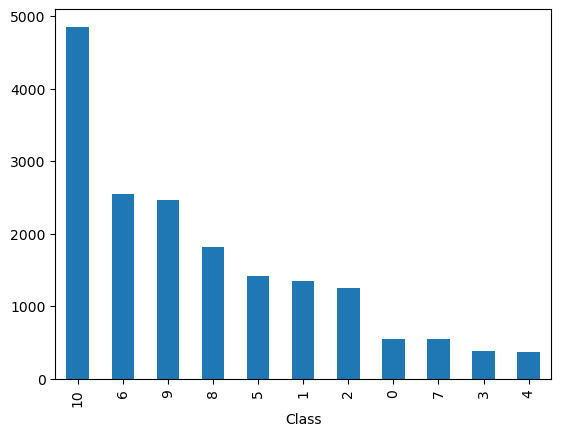

In [45]:
df['Class'].value_counts().plot(kind="bar")

In [46]:
df.drop("Track Name",inplace=True,axis=1)
df.drop("Artist Name",inplace=True,axis=1)


In [47]:
X = df.drop('Class', axis=1)
y = df['Class']

In [48]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [49]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

<Axes: xlabel='Class'>

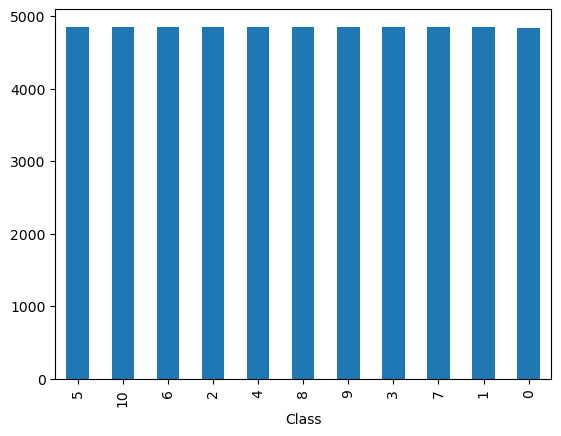

In [50]:
y.value_counts().plot(kind="bar")

In [51]:
X_train, X_test, y_train, y_test_non = train_test_split(X,y, test_size=0.2, random_state=42)

In [52]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred_non = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test_non, y_pred_non)
report = classification_report(y_test_non, y_pred_non)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       966
           1       0.56      0.57      0.56       947
           2       0.72      0.85      0.78       966
           3       0.99      0.99      0.99      1002
           4       0.95      0.98      0.96       946
           5       0.80      0.88      0.84       964
           6       0.49      0.38      0.43       946
           7       1.00      0.99      1.00       990
           8       0.75      0.83      0.79       977
           9       0.66      0.62      0.64       989
          10       0.46      0.38      0.42       970

    accuracy                           0.77     10663
   macro avg       0.76      0.77      0.76     10663
weighted avg       0.76      0.77      0.76     10663



In [94]:

data=pd.read_csv("Desktop/Data/train.csv",sep=",",encoding="latin1")[["Track Name","Artist Name","Class"]]

data


,Track Name,Artist Name,Class
0,That's What I Like (feat. Gucci Mane),Bruno Mars,5
1,Hitch a Ride,Boston,10
2,No Side to Fall In,The Raincoats,6
3,Lingo (feat. J.I & Chunkz),Deno,5
4,Nobody Weird Like Me - Remastered,Red Hot Chili Peppers,10
...,...,...,...
17991,Find Home,Green-House,6
17992,All Gone,Micatone,2
17993,Peine perdue,Smash Hit Combo,8
17994,Salomon's Gate,Beherit,8


<Axes: xlabel='Class'>

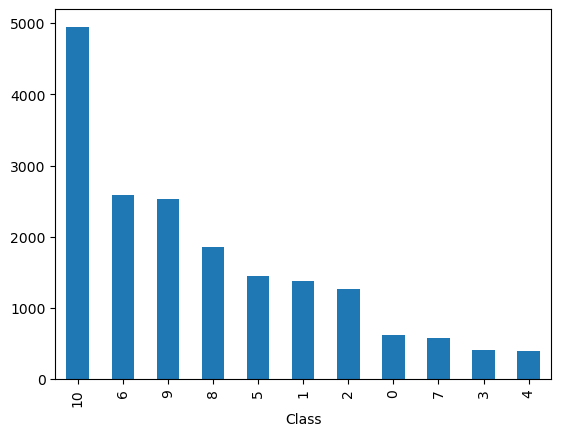

In [96]:
data["Class"].value_counts().plot(kind="bar")

In [134]:
multiNB=MultinomialNB()
logi = LogisticRegression(penalty='l2', solver='liblinear')

stacked_model=StackingClassifier(
    estimators=[('multinmialNb', multiNB), ('logiistic', logi)],
    final_estimator=RidgeClassifier() 
)


In [126]:
features = ['Track Name','Artist Name']
X = data[features] 
y = data["Class"]  

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)


vectorizer_artist = TfidfVectorizer()
vectorizer_track = TfidfVectorizer()


x_train_artist = vectorizer_artist.fit_transform(x_train["Artist Name"])
x_test_artist = vectorizer_artist.transform(x_test["Artist Name"])

x_train_track = vectorizer_track.fit_transform(x_train["Track Name"])
x_test_track = vectorizer_track.transform(x_test["Track Name"])


x_train_combined = hstack([x_train_artist, x_train_track])
x_test_combined = hstack([x_test_artist, x_test_track])


In [128]:
x_train_dense = x_train_combined.toarray()
x_test_dense = x_test_combined.toarray()

In [130]:
tomk=TomekLinks()
x_train_res,y_train_res=tomk.fit_resample(x_train_dense,y_train)

In [136]:
stacked_model.fit(x_train_res,y_train_res)

StackingClassifier(estimators=[('multinmialNb', MultinomialNB()),
                               ('logiistic',
                                LogisticRegression(solver='liblinear'))],
                   final_estimator=RidgeClassifier())

In [138]:
y_pred=stacked_model.predict(x_test_dense)

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.30      0.41       125
           1       0.12      0.01      0.01       275
           2       0.57      0.47      0.52       254
           3       0.97      0.89      0.93        80
           4       0.60      0.49      0.54        77
           5       0.61      0.53      0.57       290
           6       0.36      0.31      0.33       518
           7       0.74      0.40      0.52       115
           8       0.52      0.46      0.49       371
           9       0.61      0.48      0.53       505
          10       0.41      0.71      0.52       990

    accuracy                           0.48      3600
   macro avg       0.56      0.46      0.49      3600
weighted avg       0.48      0.48      0.46      3600

